# **Proyecto Final Data Science- CoderHouse**

* Dataset selected for analysis: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

#### Equipo
* David Alejandro Sanabria 
* Fabio Ramírez Alfaro -----> No hemos tenido razón de Fabio, aún no sabemos si sigue ocn nosotros.
* Patricia Frias  
* Marco Vinicio Altamirano F 


### Tutor
* Cristian Velazquez

### Proyecto enfocado en ML para Retail

### - - Conjunto de datos públicos de comercio electrónico brasileño por Olist
* Objetivo: Un algoritmo de ML ideal predecirá el comportamiento de las ventas en los periodos futuros.
* Nombre del archivo: Ventas3 (Base de datos limpia la cual se extrajo de las bases de datos de Olist)
* Variable Target: FH_Entrega, Estatus_Pedido.	

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime


In [22]:

# Tabajar con el dataset depurado
df_ventas2 = pd.read_feather("Ventas3.feather")


In [23]:
#Evidenciar las caracteristicas de la base de datos
df_ventas2.dtypes


Id_Pedidos                    object
Precio_Producto              float64
Precio_Flete                 float64
Categoria_Producto            object
Estatus_Pedido                object
FH_Pedido             datetime64[ns]
FH_Aprobacion         datetime64[ns]
FH_Entrega            datetime64[ns]
F_Estimada_Entrega    datetime64[ns]
Ciudad                        object
Estado                        object
Calificacion                   int64
Year                          object
Meses                         object
Dia                           object
Periodo                       object
dtype: object

In [10]:

df_ventas2.head()


,Id_Pedidos,Precio_Producto,Precio_Flete,Categoria_Producto,Estatus_Pedido,FH_Pedido,FH_Aprobacion,FH_Entrega,F_Estimada_Entrega,Ciudad,Estado,Calificacion,Year,Meses,Dia,Periodo
0,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,cool_stuff,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29,campos dos goytacazes,RJ,5,2017,09,20,2017_09
1,130898c0987d1801452a8ed92a670612,55.9,17.96,cool_stuff,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-13 20:39:29,2017-07-26,jatai,GO,5,2017,07,13,2017_07
2,532ed5e14e24ae1f0d735b91524b98b9,64.9,18.33,cool_stuff,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-06-04 18:34:26,2018-06-07,belo horizonte,MG,4,2018,06,4,2018_06
3,6f8c31653edb8c83e1a739408b5ff750,58.9,16.17,cool_stuff,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-09 21:26:33,2017-08-25,sao jose dos pinhais,PR,5,2017,08,9,2017_08
4,7d19f4ef4d04461989632411b7e588b9,58.9,13.29,cool_stuff,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-24 20:04:21,2017-09-01,conselheiro lafaiete,MG,5,2017,08,24,2017_08


In [24]:

# Agregar 4 columnas una con el año, otra mes, otra con el día y una cuarta para almacenar periodo Año_mes
df_ventas_2 = df_ventas2.assign(Year = df_ventas2['FH_Entrega'].dt.year)
df_ventas_2 = df_ventas_2.assign(Meses = df_ventas_2['FH_Entrega'].dt.month)
df_ventas_2 = df_ventas_2.assign(Dia = df_ventas_2['FH_Entrega'].dt.day)
df_ventas_2 = df_ventas_2.assign(Periodo = "0000_00")


In [25]:

# Cambiar los tipos de datos de año, mes día a texto para unirlos como cadena en la variable Periodo
df_ventas_2['Year'] = df_ventas_2['Year'].astype(str)
df_ventas_2['Meses'] = df_ventas_2['Meses'].astype(str)
df_ventas_2['Dia'] = df_ventas_2['Dia'].astype(str)


In [26]:
df_ventas_2.groupby('Periodo')['Periodo'].count()

Periodo
0000_00    99584
Name: Periodo, dtype: int64

In [27]:

# Arreglar la columana meses para obtener ordenada la serie...
df_ventas_2['Meses'] = df_ventas_2['Meses'].map({'1':'01','2':'02','3':'03','4':'04','5':'05','6':'06',
                                                 '7':'07','8':'08','9':'09','10':'10','11':'11','12':'12'
                                                })


In [28]:

# Armar la variable de periodos
df_ventas_2['Periodo'] = df_ventas_2[['Year','Meses']].agg("_".join, axis=1)


In [29]:

df_ventas_2.groupby('Periodo')['Periodo'].count()


Periodo
2016_10     217
2016_11      77
2016_12      25
2017_01     286
2017_02    1355
2017_03    2502
2017_04    1916
2017_05    3861
2017_06    3338
2017_07    3591
2017_08    4495
2017_09    4067
2017_10    4647
2017_11    4834
2017_12    7414
2018_01    6684
2018_02    5954
2018_03    7020
2018_04    8089
2018_05    7395
2018_06    7066
2018_07    6016
2018_08    8672
2018_09      60
2018_10       3
Name: Periodo, dtype: int64

In [38]:
# Se nombra la base de datos filtrada para graficarla y evideciar el comportamiento.
datos_a = df_ventas_2.groupby('Periodo')['Periodo'].count()
datos_a 

Periodo
2016_10     217
2016_11      77
2016_12      25
2017_01     286
2017_02    1355
2017_03    2502
2017_04    1916
2017_05    3861
2017_06    3338
2017_07    3591
2017_08    4495
2017_09    4067
2017_10    4647
2017_11    4834
2017_12    7414
2018_01    6684
2018_02    5954
2018_03    7020
2018_04    8089
2018_05    7395
2018_06    7066
2018_07    6016
2018_08    8672
2018_09      60
2018_10       3
Name: Periodo, dtype: int64

## - - Análisis Univariado

El análisis inicial se centra en evidenciar la cantidad de ordenes con estado entregado con el objetivo de analizar el comportamiento de las entregas (ventas completadas) por mes/año de los datos históricos.

C:\Users\Usuario\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


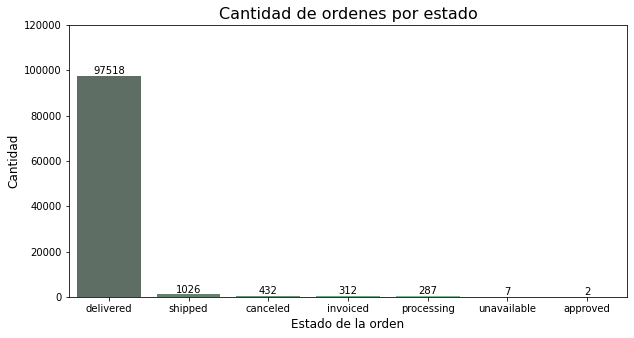

In [30]:
#Relación de las ordenes con el estado del pedido 

orderc = df_ventas_2['Estatus_Pedido'].value_counts(ascending=False)
plt.figure(figsize=(10,5))
palette = sns.color_palette('Greens_d', len(orderc))
ax = sns.barplot(orderc.index, orderc.values, alpha=0.8 , palette=np.array(palette[::-1]))
plt.title('Cantidad de ordenes por estado', fontsize=16)
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Estado de la orden', fontsize=12)
plt.ylim(0,120000) 
ax.bar_label(ax.containers[0])
plt.show()

### - - Análisis serie de tiempo tendencia y estacionalidad 

Se nota inicialmente que la distribución de las ventas a través del tiempo, no tiene estacionacionalidad aunque tiene una tendencia por lo tanto tentativamente se debe proceder con un análisis Arima.

C:\Users\Usuario\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


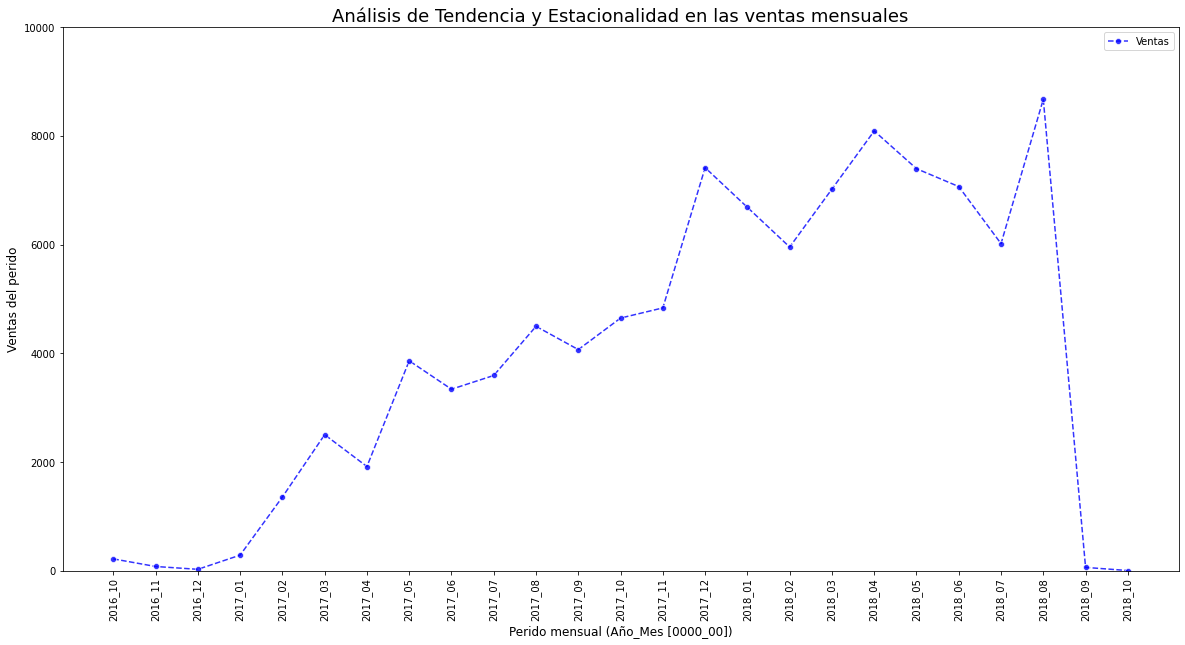

In [57]:
d_a = datos_a 
plt.figure(figsize=(20,10))
ax = sns.lineplot(d_a.index, d_a.values, alpha=0.8, linestyle='--', marker='o', color='b', label='Ventas')
plt.title('Análisis de Tendencia y Estacionalidad en las ventas mensuales', fontsize=18)
plt.ylabel('Ventas del perido', fontsize=12)
plt.xlabel('Perido mensual (Año_Mes [0000_00])', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10000) 
plt.legend()
plt.show()